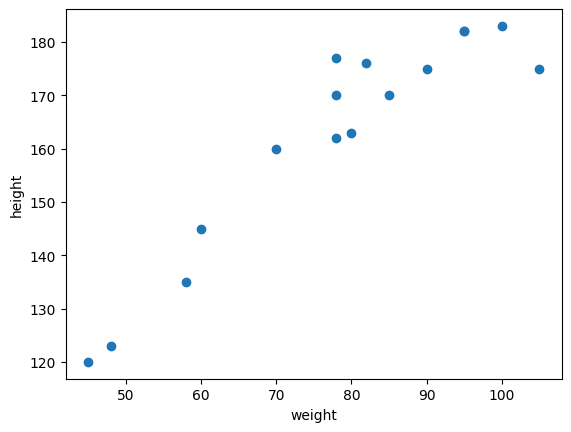

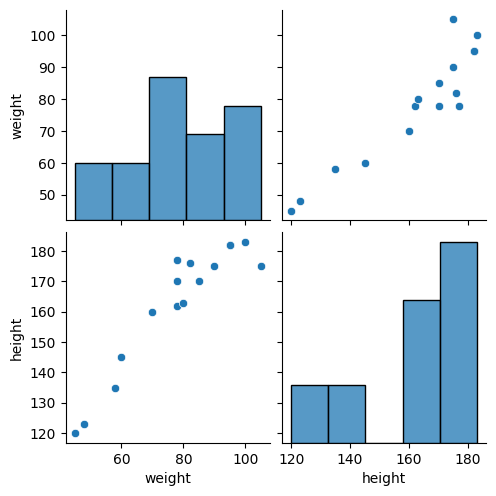

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("linear_reg.csv")
df.head()

#scatter plot implementing

plt.scatter(df["weight"],df["height"])
plt.xlabel("weight")
plt.ylabel("height")

#find correlation
df.corr()

#seaborn

import seaborn as sns
sns.pairplot(df)





In [73]:
## independent and dependent features


x = df[['weight']] ##independent features should be data frame or 2 dimensional array
y = df['height'] ##this variable can be in series or 1d array



In [74]:
np.array(y).shape

(16,)

In [75]:
##Train data creating using sklearn

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25,random_state=42)
x_train.shape

(12, 1)

In [76]:
#standardization

from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [78]:
x_test = scaler.transform(x_test)

In [79]:
x_test

array([[-2.29603432],
       [-1.4838317 ],
       [-0.23428922],
       [ 0.20305065]])

In [80]:
##Apply Simple linear Regression
from sklearn.linear_model import LinearRegression


In [81]:
regression = LinearRegression(n_jobs = -1)

In [82]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [83]:
regression.coef_

array([15.34724528])

In [84]:
print("coefficent of slope:",regression.coef_)
print("Intercept:",regression.intercept_)

coefficent of slope: [15.34724528]
Intercept: 167.58333333333334


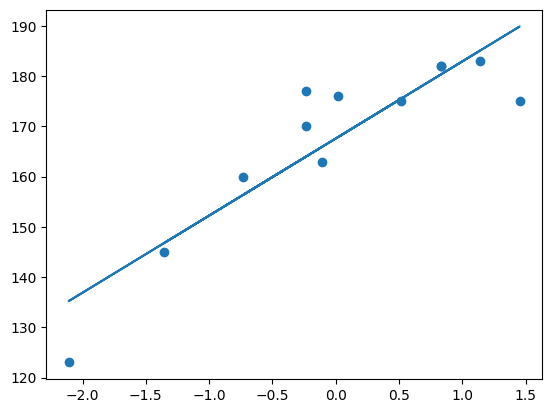

In [85]:
##plot the Training data and plot best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

## prediction of test data
1 predicted height output = intercept +coef_(weights)


y_pred_test =  589.82 + 0.05(x_test)

In [86]:
#prediction for test data

y_pred = regression.predict(x_test)

In [87]:
##performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [88]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

63.27506336142847
6.210844108319108
7.954562424258701


es


R SQUARE

Formula


R^2 = 1 -SSR/SST
}
R^2	=	coefficient of determinati
on|
RSS	=	sum of squares of residu
as
T
TSS	=	total sum of squares


In [89]:
from sklearn.metrics import r2_score

In [90]:
score = r2_score(y_test,y_pred)
print(score)

0.8444135525153134


Adjusted R2 = 1 (1- R²)*(N-1)/(N-k-1) 

Where :

R2: of the model
N: The number of observations
k: the number of predicted variables

In [91]:
#display adjusted R- Squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.76662032877297

In [92]:
##OLS technique of linear regression
import statsmodels.api as sm

In [93]:
model = sm.OLS(y_train,x_train).fit()

In [94]:
prediction = model.predict(x_test)
print(prediction)

[-35.2378019  -22.77272912  -3.59569407   3.1162682 ]


In [95]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 height   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.082
Method:                 Least Squares   F-statistic:                            0.09207
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                       0.767
Time:                        12:18:12   Log-Likelihood:                         -78.497
No. Observations:                  12   AIC:                                      159.0
Df Residuals:                      11   BIC:                                      159.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\program files\python38\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [96]:
##prediction for new data
regression.predict([[65]])

array([1165.15427673])

In [97]:
##prediction for new data by using scalar transform cause the value is big in prediction
regression.predict(scaler.transform([[72]]))

c:\program files\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([158.23452875])